In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#학습이미지와 학습 이미지의 라벨링 그리고 테스트 이미지와 테스트 이미지의 라벨링 데이터를 가져와 저장합니다
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [14]:
#데이터 전처리 진행합니다
#학습 이미지는 6만개 사용하여 학습하라 했으니 6만개 입력!
train_images = train_image.reshape((60000, 28, 28, 1))

#테스트 이미지는  1만개 사용하여 정확도 검증하라하여 1만개 입력!
test_image = test_image.reshape((10000, 28, 28, 1))


train_image, test_image = train_image / 255.0, test_image / 255.0

In [15]:
#합성곰 신경만 구조

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=2,activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=2,activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=2,activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 128)              

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history=model.fit(train_image, train_label, epochs=10,validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 0.3102 - accuracy: 0.9014 - val_loss: 0.0971 - val_accuracy: 0.9691
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0938 - accuracy: 0.9708 - val_loss: 0.0971 - val_accuracy: 0.9702
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0755 - val_accuracy: 0.9769
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0986 - val_accuracy: 0.9724
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0597 - val_accuracy: 0.9824
Epoch 6/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0679 - val_accuracy:

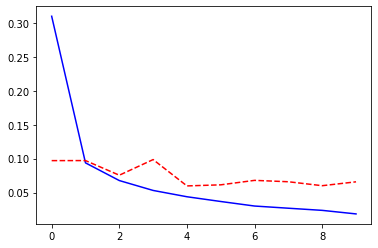

In [18]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r--')

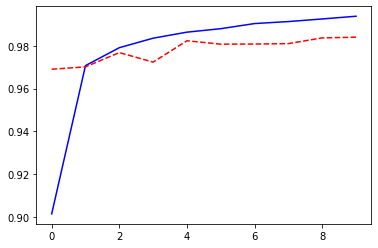

In [20]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r--')